In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import (train_test_split,
                                     cross_val_score, KFold, GridSearchCV)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix)
from imutils import paths
import cv2
import os
import numpy as np
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
import io
import os

In [114]:
url = "https://github.com/10sajan10/CS6830_Project7/raw/main/sateliteimage.zip"

response = requests.get(url)
if response.status_code == 200:
    print("Download successful!")
    
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall()
        print(f"Files extracted")

Download successful!
Files extracted


In [115]:
def extract_color_stats(image):

    B, G, R = cv2.split(image)

    mean_R, mean_G, mean_B = np.mean(R), np.mean(G), np.mean(B)
    std_R, std_G, std_B = np.std(R), np.std(G), np.std(B)

    features = [mean_R, mean_G, mean_B, std_R, std_G, std_B]

    return features

In [116]:
imagePaths = paths.list_images(r'sateliteimage/')
data = []
labels_str = []
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    features = extract_color_stats(image)
    data.append(features)

    # extract the class label from the file path and update the labels list
    label = imagePath.split(os.path.sep)[-2].split("/")[1]
    labels_str.append(label)

le = LabelEncoder()
labels = le.fit_transform(labels_str)

IndexError: list index out of range

In [ ]:
labels_str

In [117]:
df = pd.DataFrame(data, columns=['mean_R', 'mean_G', 'mean_B', 'std_R', 'std_G', 'std_B'])
df['label'] = labels_str

ValueError: Length of values (0) does not match length of index (1)

ValueError: Could not interpret value `label` for `hue`. An entry with this name does not appear in `data`.

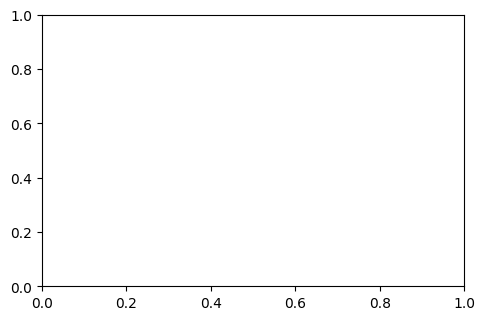

In [118]:
plt.figure(figsize=(12, 12))

# Plot for mean(R)
plt.subplot(3, 2, 1)
sns.histplot(data=df, x='mean_R', hue='label', kde=True)
plt.title('Distribution of Mean Red (R) Channel')

# Plot for std(R)
plt.subplot(3, 2, 2)
sns.histplot(data=df, x='std_R', hue='label', kde=True)
plt.title('Distribution of Std Red (R) Channel')

# Plot for mean(G)
plt.subplot(3, 2, 3)
sns.histplot(data=df, x='mean_G', hue='label', kde=True)
plt.title('Distribution of Mean Green (G) Channel')

# Plot for std(G)
plt.subplot(3, 2, 4)
sns.histplot(data=df, x='std_G', hue='label', kde=True)
plt.title('Distribution of Std Green (G) Channel')

# Plot for mean(B)
plt.subplot(3, 2, 5)
sns.histplot(data=df, x='mean_B', hue='label', kde=True)
plt.title('Distribution of Mean Blue (B) Channel')

# Plot for std(B)
plt.subplot(3, 2, 6)
sns.histplot(data=df, x='std_B', hue='label', kde=True)
plt.title('Distribution of Std Blue (B) Channel')

plt.tight_layout()
plt.show()

ValueError: Could not interpret value `label` for `hue`. An entry with this name does not appear in `data`.

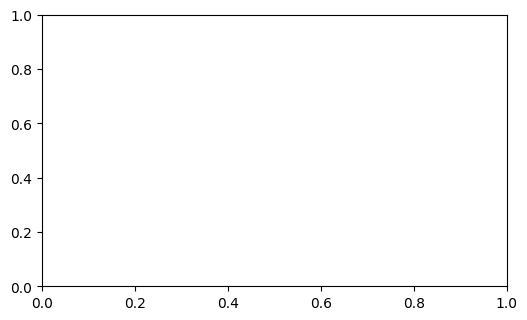

In [119]:
plt.figure(figsize=(6, 12))

# Plot for mean_R vs mean_G
plt.subplot(3, 1, 1)
sns.scatterplot(data=df, x='mean_R', y='mean_G', hue='label')
plt.title('Mean Red (R) vs. Mean Green (G)')
plt.xlabel('Mean Red (R)')
plt.ylabel('Mean Green (G)')

# Plot for mean_R vs mean_B
plt.subplot(3, 1, 2)
sns.scatterplot(data=df, x='mean_R', y='mean_B', hue='label')
plt.title('Mean Red (R) vs. Mean Blue (B)')
plt.xlabel('Mean Red (R)')
plt.ylabel('Mean Blue (B)')

# Plot for mean_G vs mean_B
plt.subplot(3, 1, 3)
sns.scatterplot(data=df, x='mean_G', y='mean_B', hue='label')
plt.title('Mean Green (G) vs. Mean Blue (B)')
plt.xlabel('Mean Green (G)')
plt.ylabel('Mean Blue (B)')

plt.tight_layout()
plt.show()

In [120]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
trainscore = {}
test_accuracy = {}
test_precision = {}
test_recall = {}
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
scores = cross_val_score(log_reg, trainX, trainY, cv=cv)
trainscore['Logistic_Regression'] = scores.mean()

NameError: name 'labels' is not defined

In [121]:
log_reg.fit(trainX, trainY)
predicted_test_labels = log_reg.predict(testX)
conf_matrix = confusion_matrix(testY, predicted_test_labels)
print("Confusion Matrix of Logistic Regression:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
le
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

NameError: name 'log_reg' is not defined

In [122]:
test_accuracy['Logistic_Regression'] = accuracy_score(testY, predicted_test_labels)
test_precision['Logistic_Regression'] = precision_score(testY, predicted_test_labels, average='weighted')
test_recall['Logistic_Regression'] = recall_score(testY, predicted_test_labels, average='weighted')

NameError: name 'testY' is not defined

In [123]:
svc = SVC(random_state=42)
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3], 'kernel': ['poly']}]
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid.fit(trainX, trainY)
print(grid.best_params_)
print(grid.best_score_)
trainscore['SVC'] = grid.best_score_

NameError: name 'trainX' is not defined

In [124]:
predicted_labels = grid.predict(testX)
test_accuracy['SVC'] = accuracy_score(testY, predicted_labels)
test_precision['SVC'] = precision_score(testY, predicted_labels, average='weighted')
test_recall['SVC'] = recall_score(testY, predicted_labels, average='weighted')
print("Confusion Matrix of SVC:")
conf_matrix=confusion_matrix(testY, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


NameError: name 'testX' is not defined

In [125]:
df = pd.DataFrame({'Train Accuracy': trainscore, 'Test Accuracy': test_accuracy, 'Test Precision': test_precision})
print(df)

NameError: name 'trainscore' is not defined

### Diabetes Dataset

## Which variables are predictive of the target variable?

In [9]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv('diabetes.csv')

# Prepare features and target
X = df[['Glucose', 'BloodPressure', 'Pregnancies', 'BMI']]
y = df['Outcome']

# Fit logistic regression model using statsmodels
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.480748
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2567
Time:                        00:20:06   Log-Likelihood:                -369.21
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.302e-54
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.6574      0.658    -11.642      0.000      -8.947      -6.368
Glucose           0.

## What do plots of selected pairs of variables look like? Where is the decision boundary in those plots?

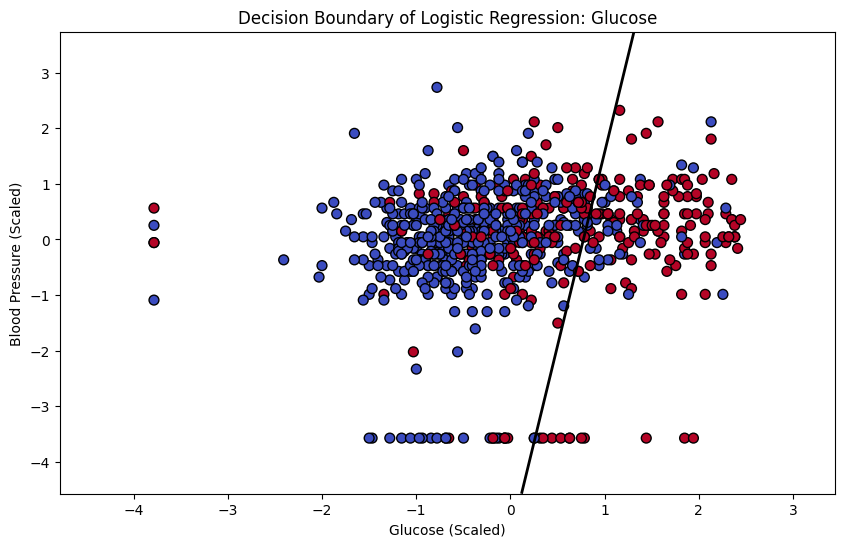

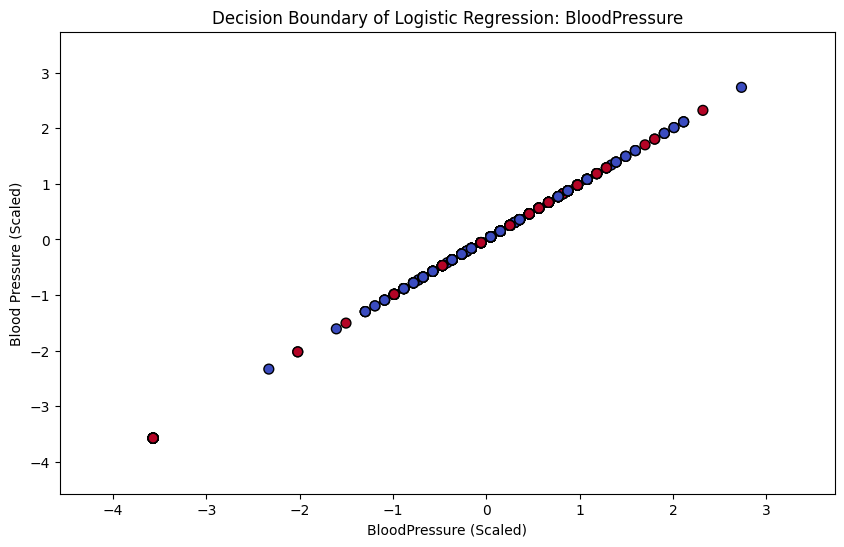

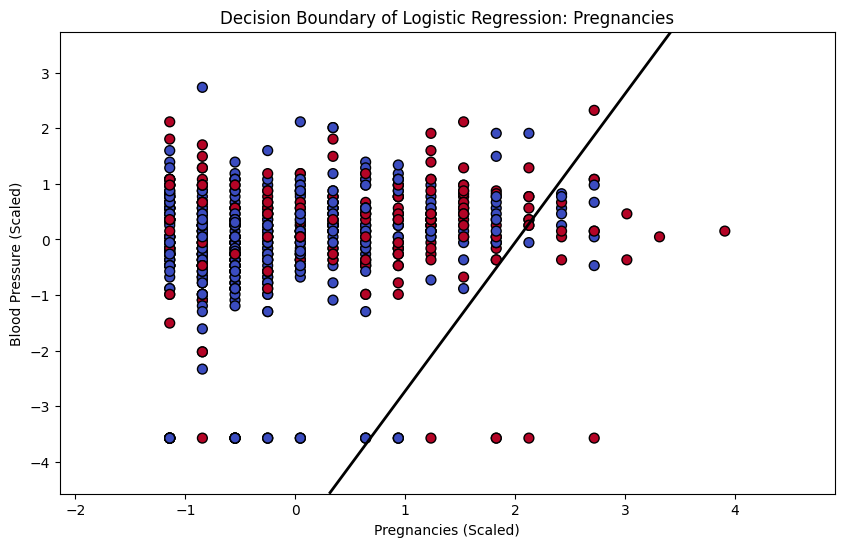

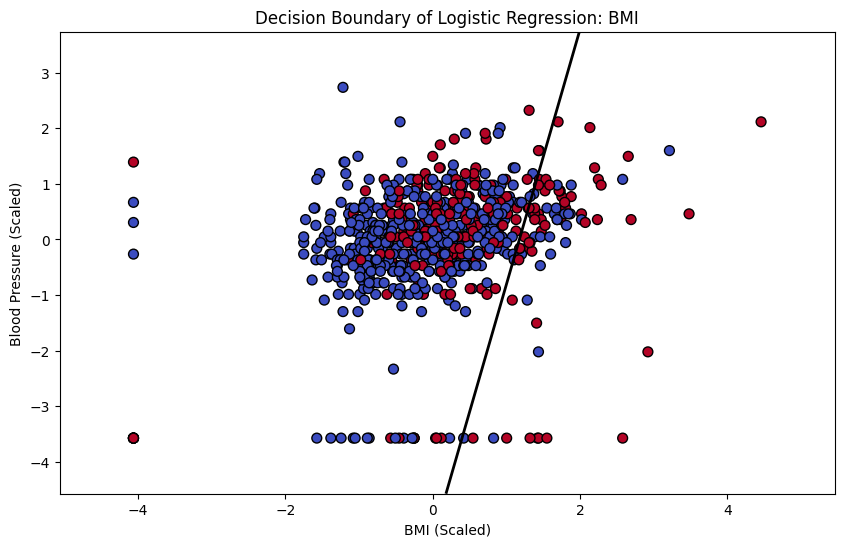

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# Train logistic regression using sklearn
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(x_train, y_train)

# Define a function to plot the decision boundary for a given feature
def plot_decision_boundary(feature_index, feature_name):
    # Get the min and max for the feature and Blood Pressure
    x_min, x_max = X_scaled[:, feature_index].min() - 1, X_scaled[:, feature_index].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1  # BloodPressure is at index 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

    # Prepare input data for predict_proba
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_full = np.zeros((grid_points.shape[0], X_scaled.shape[1]))
    grid_points_full[:, feature_index] = grid_points[:, 0]  # Set the selected feature
    grid_points_full[:, 1] = grid_points[:, 1]              # Set Blood Pressure

    # Predict probabilities
    probs_logistic = logisticRegr.predict_proba(grid_points_full)[:, 1]
    probs_logistic = probs_logistic.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_scaled[:, feature_index], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
    plt.contour(xx, yy, probs_logistic, levels=[0.5], linewidths=2, colors='black')
    plt.xlabel(f'{feature_name} (Scaled)')
    plt.ylabel('Blood Pressure (Scaled)')
    plt.title(f'Decision Boundary of Logistic Regression: {feature_name}')
    plt.show()

# List of features and their names
features = [(0, 'Glucose'), (1, 'BloodPressure'), (2, 'Pregnancies'), (3, 'BMI')]

# Generate plots for each feature
for feature_index, feature_name in features:
    plot_decision_boundary(feature_index, feature_name)

## Can logistic regression or a linear SVM predict well?

In [12]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_scaled, y, cv=5)
print(f"Logistic Regression CV Accuracy: {logistic_cv_scores.mean():.2f}")

# Cross-validation for Linear SVM
svm_cv_scores = cross_val_score(LinearSVC(max_iter=1000), X_scaled, y, cv=5)
print(f"Linear SVM CV Accuracy: {svm_cv_scores.mean():.2f}")


Logistic Regression CV Accuracy: 0.77
Linear SVM CV Accuracy: 0.77


## Is there a difference between the polynomial and RBF SVMs?

In [13]:
from sklearn.svm import SVC

# Train RBF SVM
rbf_svm_model = SVC(kernel='rbf', probability=True)
rbf_svm_model.fit(x_train, y_train)
y_pred_rbf = rbf_svm_model.predict(x_test)

# Train Polynomial SVM
poly_svm_model = SVC(kernel='poly', degree=3, probability=True)
poly_svm_model.fit(x_train, y_train)
y_pred_poly = poly_svm_model.predict(x_test)

# Compare performance
for model_name, y_pred in zip(['RBF SVM', 'Polynomial SVM'], [y_pred_rbf, y_pred_poly]):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}")


RBF SVM - Accuracy: 0.79
Polynomial SVM - Accuracy: 0.75


## What effect does changing the class_weight in an SVM have on your data? How might this be important for this data?

In [14]:
# Train SVM with class_weight
balanced_svm_model = SVC(class_weight='balanced')
balanced_svm_model.fit(x_train, y_train)
y_pred_balanced = balanced_svm_model.predict(x_test)

# Evaluate model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Balanced SVM - Accuracy: {accuracy_balanced:.2f}")

# Compare with previous SVM
print(f"Original SVM - Accuracy: {accuracy:.2f}")


Balanced SVM - Accuracy: 0.76
Original SVM - Accuracy: 0.75


## Is there a difference in runtime performance?

In [15]:
import time

# Measure runtime for Logistic Regression
start_time = time.time()
logisticRegr.fit(x_train, y_train)
logistic_runtime = time.time() - start_time

# Measure runtime for SVM
start_time = time.time()
svm_model.fit(x_train, y_train)
svm_runtime = time.time() - start_time

print(f"Logistic Regression Runtime: {logistic_runtime:.4f} seconds")
print(f"SVM Runtime: {svm_runtime:.4f} seconds")


Logistic Regression Runtime: 0.0103 seconds
SVM Runtime: 0.0052 seconds


## Logistic regression and LinearSVC use one-vs-rest (OVR) for multi-class classification. SVC uses one-vs-one (OVO). Where n is the number of classes, OVR learns n models, whereas OVO learns n(n-1)/2 (n choose 2) models. What effect does this have on performance?

In [16]:
# For multi-class, we can use SVC with OVO and OVR
from sklearn.metrics import accuracy_score

# Train OVR SVC
ovr_svc_model = SVC(decision_function_shape='ovr')
ovr_svc_model.fit(x_train, y_train)
y_pred_ovr = ovr_svc_model.predict(x_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

# Train OVO SVC
ovo_svc_model = SVC(decision_function_shape='ovo')
ovo_svc_model.fit(x_train, y_train)
y_pred_ovo = ovo_svc_model.predict(x_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"OVR SVC Accuracy: {accuracy_ovr:.2f}")
print(f"OVO SVC Accuracy: {accuracy_ovo:.2f}")


OVR SVC Accuracy: 0.79
OVO SVC Accuracy: 0.79
